In [227]:
import pandas as pd
from pandas import DataFrame

import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import  RandomForestRegressor
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

%matplotlib inline

In [228]:
rossi = pd.read_csv('rossi.csv')
lorenzo = pd.read_csv('lorenzo.csv')
marquez = pd.read_csv('marquez.csv')
pedrosa = pd.read_csv('pedrosa.csv')
dovizioso = pd.read_csv('dovizioso.csv')
iannone= pd.read_csv('iannone.csv')
vinales = pd.read_csv('vinales.csv')
hernandez = pd.read_csv('hernandez.csv')

In [229]:
rossi.head(),lorenzo.head(),marquez.head(),pedrosa.head()

(   fastestlap  length  longest straight  left corners  right corners  width 
 0     115.171    5380              1068             6             10      12
 1     100.635    4806              1076             5              9      16
 2     125.801    5513              1200            11              9      15
 3     100.090    4423               607             5              8      11
 4      93.293    4185               674             5              9      13,
    fastestlap  length  longest straight  left corners  right corners  width
 0     114.927    5380              1068             6             10     12
 1     101.695    4806              1076             5              9     16
 2     124.908    5513              1200            11              9     15
 3     100.317    4423               607             5              8     11
 4      93.432    4185               674             5              9     13,
    fastest lap  length  longest straight  left corners  right corne

In [230]:
spiel = pd.read_csv('spielberg.csv')

In [231]:
spiel

,length,longest straight,left corners,right corners,width
0,4300,626,2,7,13


In [232]:
model_ros = RandomForestRegressor(1000)
model_ros.fit(rossi.ix[:, 1:6], rossi.ix[:,0])
fit_ros = model_ros.predict(spiel)

model_lor = RandomForestRegressor(100)
model_lor.fit(lorenzo.ix[:, 1:6], lorenzo.ix[:,0])
fit_lor = model_lor.predict(spiel)

model_mar = RandomForestRegressor(100)
model_mar.fit(marquez.ix[:, 1:6], marquez.ix[:,0])
fit_mar = model_mar.predict(spiel)

model_ped = RandomForestRegressor(100)
model_ped.fit(pedrosa.ix[:, 1:6], pedrosa.ix[:,0])
fit_ped = model_ped.predict(spiel)

model_dov = RandomForestRegressor(100)
model_dov.fit(dovizioso.ix[:, 1:6], dovizioso.ix[:,0])
fit_dov = model_dov.predict(spiel)

model_ian = RandomForestRegressor(100)
model_ian.fit(iannone.ix[:, 1:6], iannone.ix[:,0])
fit_ian = model_ian.predict(spiel)

model_vin = RandomForestRegressor(100)
model_vin.fit(vinales.ix[:, 1:6], vinales.ix[:,0])
fit_vin = model_vin.predict(spiel)

model_her = RandomForestRegressor(100)
model_her.fit(hernandez.ix[:, 1:6], hernandez.ix[:,0])
fit_her = model_her.predict(spiel)

In [233]:
fit_ros,fit_lor,fit_mar,fit_ped,fit_dov,fit_ian,fit_vin,fit_her


(array([ 94.03267]),
 array([ 93.99397]),
 array([ 93.96735]),
 array([ 94.42767]),
 array([ 94.41365]),
 array([ 94.28376]),
 array([ 95.16397]),
 array([ 95.07052]))

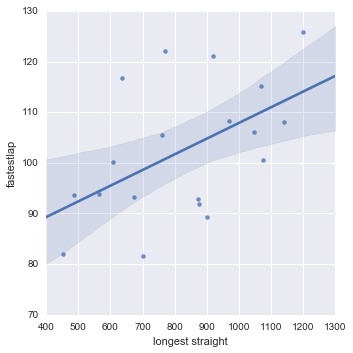

In [234]:
sns.lmplot('longest straight','fastestlap',data=rossi)

In [235]:
#何度も試行
for n in range(20):
    
    #グリッドサーチ
    from sklearn.grid_search import GridSearchCV
    params =  [{'n_estimators': [10, 30, 50, 70, 90, 110, 130, 150, 200,500,1000], 
               'max_features':['auto', 'sqrt', 'log2', None]}]

    #それぞれのライダー別個でグリッドサーチして学習、予測
    model_ros = GridSearchCV(RandomForestRegressor(oob_score=True),
                         params,cv=3)
    model_ros.fit(rossi.ix[:, 1:6], rossi.ix[:,0])
    model_ros = model_ros.best_estimator_
    #print(model_ros)
    fit_ros = model_ros.predict(spiel)

    model_lor = GridSearchCV(RandomForestRegressor(oob_score=True),
                         params,cv=3)
    model_lor.fit(lorenzo.ix[:, 1:6], lorenzo.ix[:,0])
    model_lor = model_lor.best_estimator_
    #print(model_lor)
    fit_lor = model_lor.predict(spiel)

    model_mar = GridSearchCV(RandomForestRegressor(oob_score=True),
                         params,cv=3)
    model_mar.fit(marquez.ix[:, 1:6], marquez.ix[:,0])
    model_mar = model_mar.best_estimator_
    #print(model_mar)
    fit_mar = model_mar.predict(spiel)

    model_ped = GridSearchCV(RandomForestRegressor(oob_score=True),
                         params,cv=3)
    model_ped.fit(pedrosa.ix[:, 1:6], pedrosa.ix[:,0])
    model_ped = model_ped.best_estimator_
    #print(model_ped)
    fit_ped = model_ped.predict(spiel)

    model_dov = GridSearchCV(RandomForestRegressor(oob_score=True),
                         params,cv=3)
    model_dov.fit(dovizioso.ix[:, 1:6], dovizioso.ix[:,0])
    model_dov = model_dov.best_estimator_
    #print(model_dov)
    fit_dov = model_dov.predict(spiel)

    model_ian = GridSearchCV(RandomForestRegressor(oob_score=True),
                         params,cv=3)
    model_ian.fit(iannone.ix[:, 1:6], iannone.ix[:,0])
    model_ian = model_ian.best_estimator_
    #print(model_ian)
    fit_ian = model_ian.predict(spiel)

    model_vin = GridSearchCV(RandomForestRegressor(oob_score=True),
                         params,cv=3)
    model_vin.fit(vinales.ix[:, 1:6], vinales.ix[:,0])
    model_vin = model_vin.best_estimator_
    #print(model_vin)
    fit_vin = model_vin.predict(spiel)

    model_her = GridSearchCV(RandomForestRegressor(oob_score=True),
                         params,cv=3)
    model_her.fit(hernandez.ix[:, 1:6], hernandez.ix[:,0])
    model_her= model_her.best_estimator_
    #print(model_her)
    fit_her = model_her.predict(spiel)

    #Seriesに格納
    result = pd.Series([float(fit_ros),float(fit_lor),float(fit_mar),float(fit_ped), float(fit_dov), float(fit_ian),float(fit_vin),float(fit_her)],
                                             index=['Rossi', 'Lorenzo', 'Marquez', 'Pedrosa', 'Dovizioso', 'Iannone', 'Vinales', 'Hernandez'])
    print(result)

    #CSV出力
    import os
    result_df = DataFrame(result).T
    if not os.path.isfile('results.csv'):
        result_df.to_csv('results.csv')
    else:
        result_df.to_csv('results.csv',mode='a',header=False)

/Users/omata/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:687: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/omata/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:687: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


KeyboardInterrupt: 

In [236]:
result_df

,Rossi,Lorenzo,Marquez,Pedrosa,Dovizioso,Iannone,Vinales,Hernandez
0,94.969556,94.225945,93.784367,94.1663,94.802729,94.6166,94.407567,97.0987


In [237]:
model_ros.feature_importances_

AttributeError: 'GridSearchCV' object has no attribute 'feature_importances_'

In [238]:
model_lor.feature_importances_

array([ 0.87249085,  0.04068099,  0.01862193,  0.04736979,  0.02083643])

In [1]:
model_her.feature_importances_

NameError: name 'model_her' is not defined

In [240]:
model_mar.feature_importances_

array([ 0.85408562,  0.03910116,  0.0229491 ,  0.05675867,  0.02710544])

In [241]:
model_ped.feature_importances_

array([ 0.87281214,  0.03499947,  0.02444916,  0.04695572,  0.02078351])

In [242]:
model_dov.feature_importances_

array([ 0.85698135,  0.04289875,  0.0224725 ,  0.05558078,  0.02206662])

In [243]:
hernandez

,fastestlap,length,longest straight,left corners,right corners,width
0,103.297,4806,1076,5,9,16
1,126.494,5513,1200,11,9,15
2,101.646,4423,607,5,8,11
3,94.833,4185,674,5,9,13
4,109.159,5245,1141,6,9,14
5,107.128,4655,1047,7,9,12
6,95.010,4542,487,6,12,14
7,82.502,3671,700,10,3,10
8,93.782,4170,872,10,6,16
9,118.530,5403,636,6,8,15


In [244]:
sns.lmplot('', 'fastestlap', data=hernandez)

KeyError: "[''] not in index"

In [247]:
model_ros.error_score

'raise'